# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
baseURL = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{baseURL}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | astana
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | halalo
City not found. Skipping...
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | xining
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | talakan
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | ginir
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | victoria
Pr

Processing Record 35 of Set 4 | basco
Processing Record 36 of Set 4 | marzuq
Processing Record 37 of Set 4 | kyren
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | xiaoweizhai
Processing Record 40 of Set 4 | suifenhe
Processing Record 41 of Set 4 | grand centre
City not found. Skipping...
Processing Record 42 of Set 4 | kongolo
Processing Record 43 of Set 4 | akyab
Processing Record 44 of Set 4 | letnica
Processing Record 45 of Set 4 | medford
Processing Record 46 of Set 4 | miranda
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | berlevag
Processing Record 0 of Set 5 | fortuna
Processing Record 1 of Set 5 | miyako
Processing Record 2 of Set 5 | bara
Processing Record 3 of Set 5 | namuac
Processing Record 4 of Set 5 | edd
Processing Record 5 of Set 5 | vanimo
Processing Record 6 of Set 5 | shakawe
Processing Record 7 of Set 5 | ust-omchug
Processing Record 8 of Set 5 | bo

Processing Record 22 of Set 8 | dickinson
Processing Record 23 of Set 8 | arlit
Processing Record 24 of Set 8 | maketu
Processing Record 25 of Set 8 | biak
Processing Record 26 of Set 8 | lata
Processing Record 27 of Set 8 | okha
Processing Record 28 of Set 8 | bolshaya sosnova
Processing Record 29 of Set 8 | xuchang
Processing Record 30 of Set 8 | mildura
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | ketchikan
Processing Record 33 of Set 8 | tazovskiy
Processing Record 34 of Set 8 | lompoc
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | burnie
Processing Record 37 of Set 8 | blackwater
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | davenda
Processing Record 40 of Set 8 | hwange
Processing Record 41 of Set 8 | avera
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | aykhal
Processing Record 44 of Set 8 | san cristobal
Processing Record 45 of Set 8 | mahebourg
Processing Record 46 of

Processing Record 10 of Set 12 | gornopravdinsk
Processing Record 11 of Set 12 | paciran
Processing Record 12 of Set 12 | methoni
Processing Record 13 of Set 12 | shenandoah
Processing Record 14 of Set 12 | alta floresta
Processing Record 15 of Set 12 | zhuhai
Processing Record 16 of Set 12 | victor harbor
Processing Record 17 of Set 12 | bambanglipuro
Processing Record 18 of Set 12 | kemerovo
Processing Record 19 of Set 12 | nova bystrice
Processing Record 20 of Set 12 | mahajanga
Processing Record 21 of Set 12 | madaoua
Processing Record 22 of Set 12 | iwanai
Processing Record 23 of Set 12 | sambava
Processing Record 24 of Set 12 | kungurtug
Processing Record 25 of Set 12 | graaff-reinet
Processing Record 26 of Set 12 | preston
Processing Record 27 of Set 12 | phan rang
City not found. Skipping...
Processing Record 28 of Set 12 | mouila
Processing Record 29 of Set 12 | erie
Processing Record 30 of Set 12 | koungheul
Processing Record 31 of Set 12 | orlik
Processing Record 32 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-23.58,64,40,6.17,CA,1677961558
1,airai,-8.9266,125.4092,14.77,92,100,1.28,TL,1677961623
2,astana,51.1801,71.4460,-11.03,79,0,4.00,KZ,1677961420
3,clyde river,70.4692,-68.5914,-16.87,60,100,3.60,CA,1677961451
4,katsuura,35.1333,140.3000,11.12,67,100,7.71,JP,1677961624


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-23.58,64,40,6.17,CA,1677961558
1,airai,-8.9266,125.4092,14.77,92,100,1.28,TL,1677961623
2,astana,51.1801,71.4460,-11.03,79,0,4.00,KZ,1677961420
3,clyde river,70.4692,-68.5914,-16.87,60,100,3.60,CA,1677961451
4,katsuura,35.1333,140.3000,11.12,67,100,7.71,JP,1677961624


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

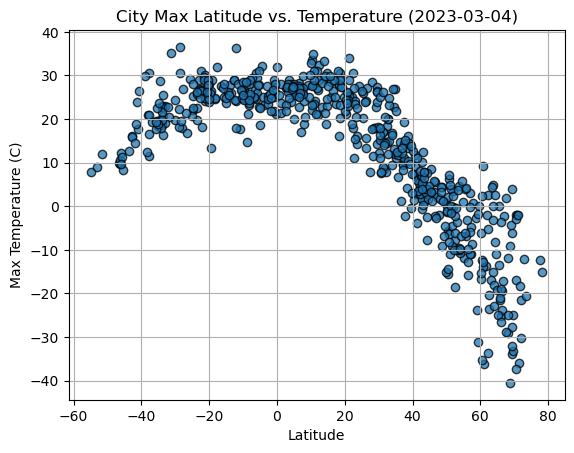

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

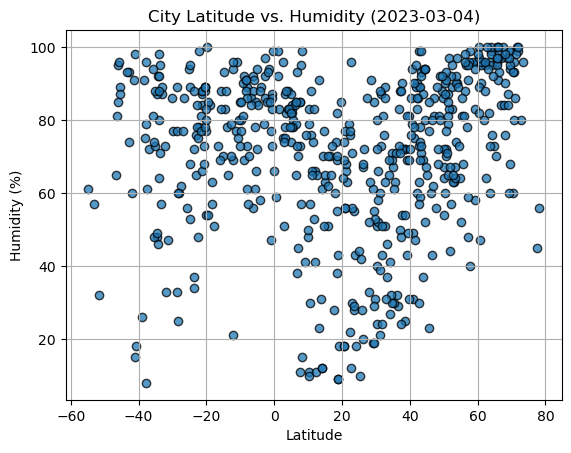

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

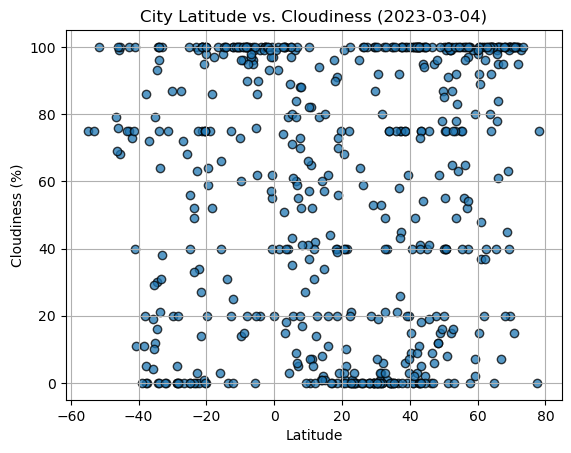

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

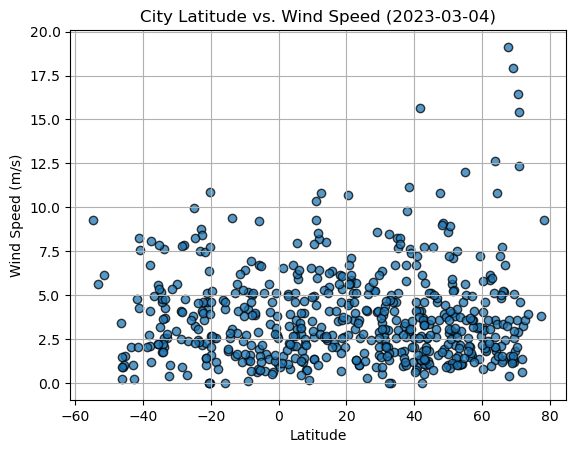

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


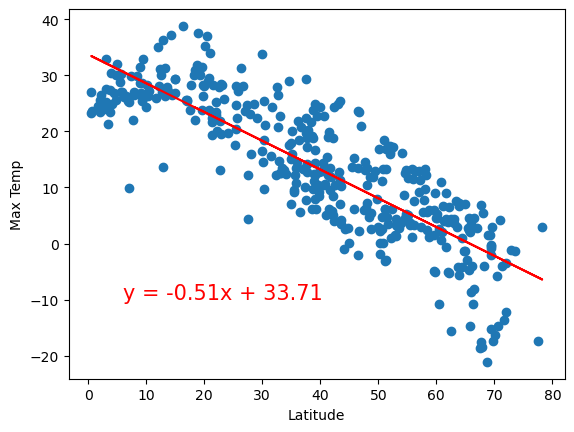

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


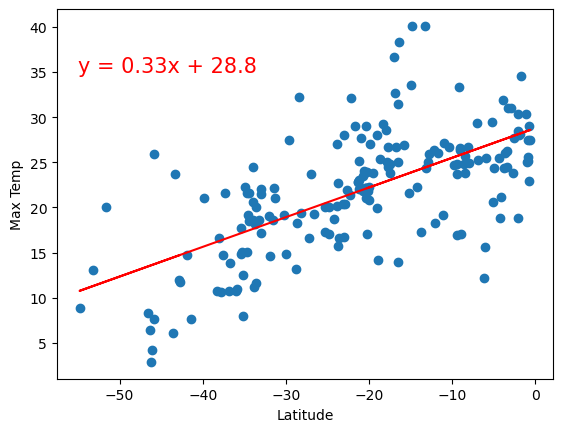

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


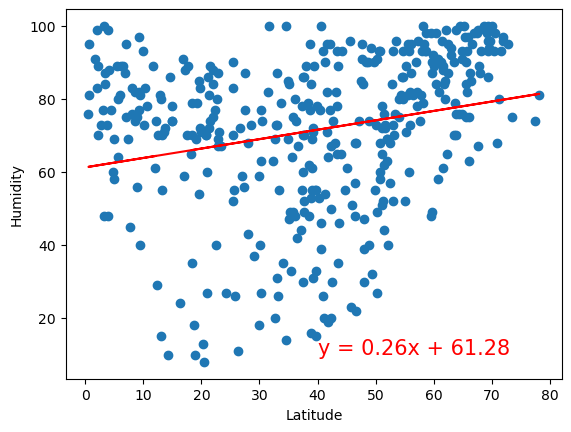

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


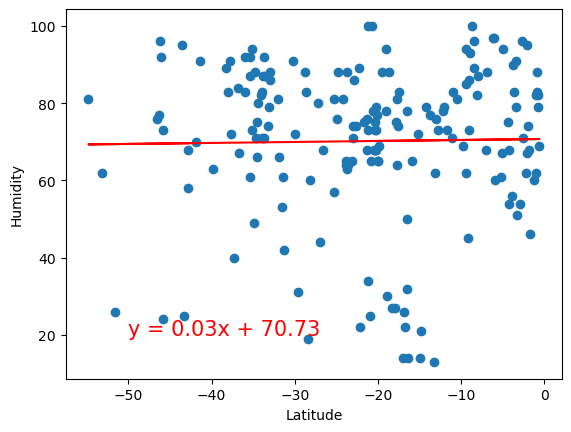

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


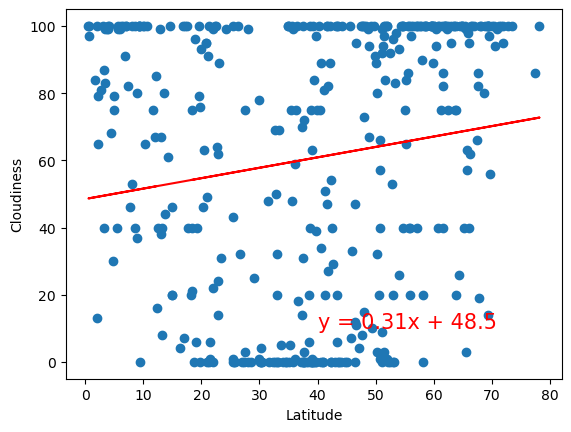

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


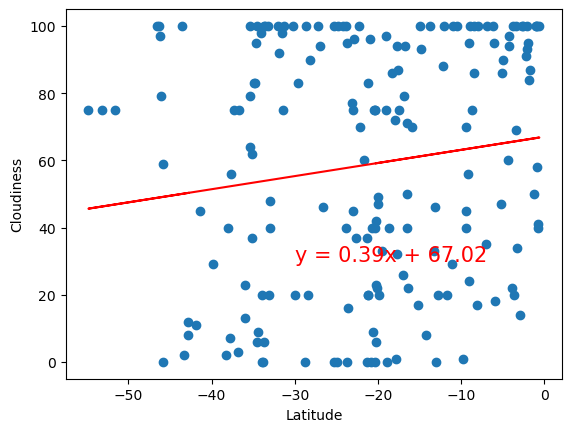

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


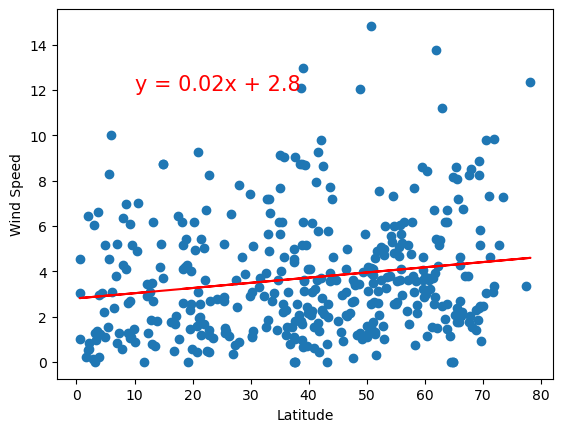

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


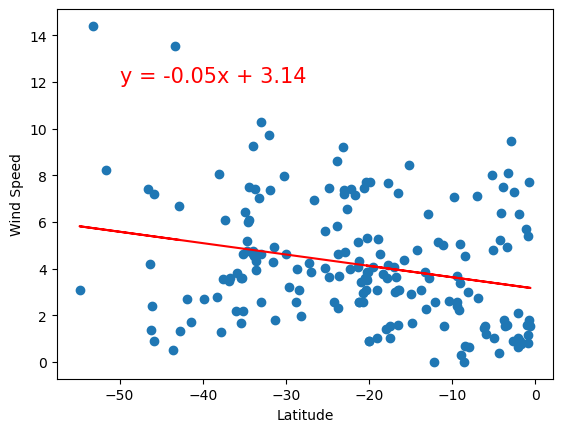

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE